In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = np.load('data/data_analasys.npy')

max_num = np.max(data)
min_num = np.min(data)
mean_num = np.mean(data)
std_num = np.std(data)

print(f"During training: Max {max_num}, Min {min_num}, Mean {mean_num:.2f}, Std {std_num:.2f}")

During training: Max 1140.0, Min 5.0, Mean 391.43, Std 153.79


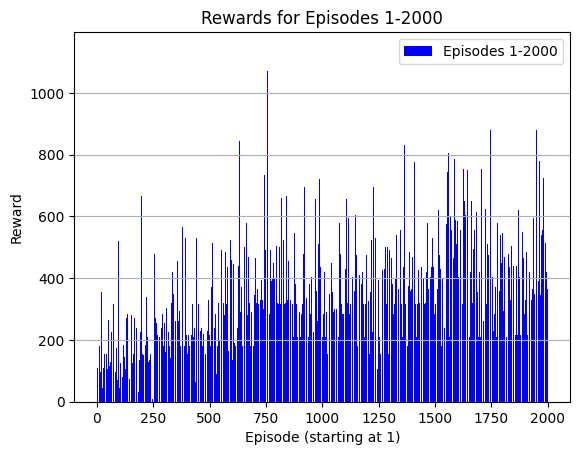

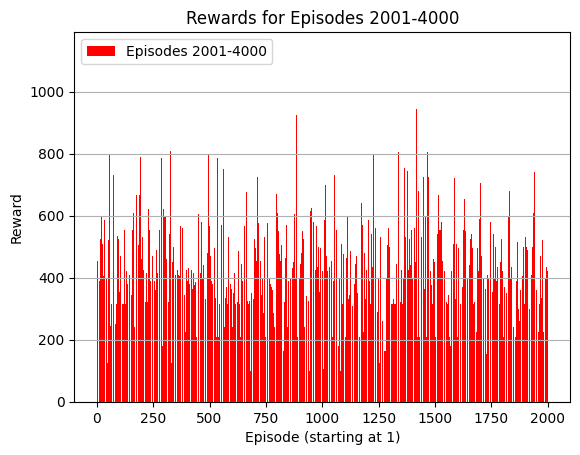

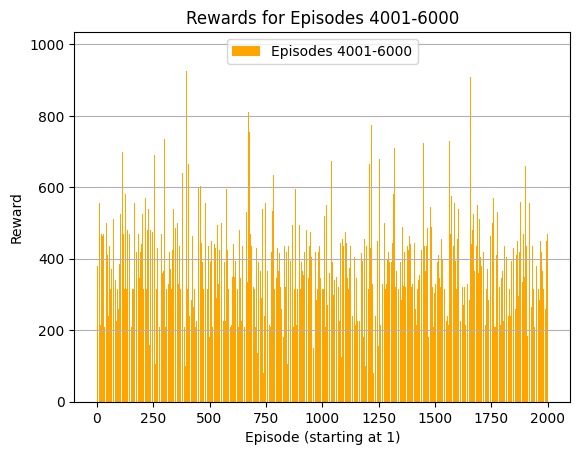

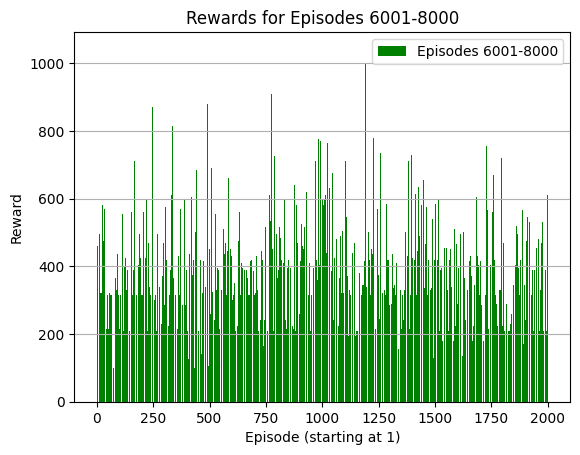

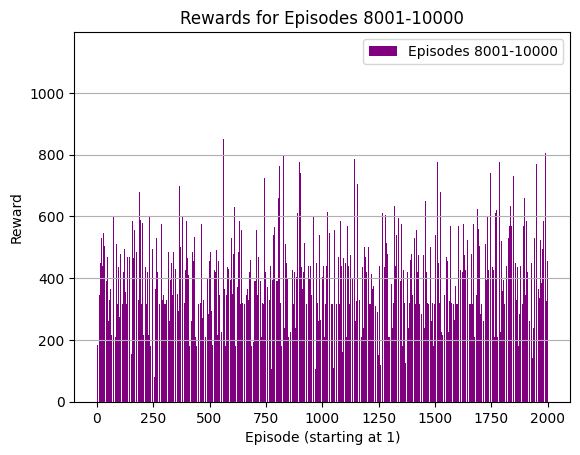

In [15]:
num_episodes = len(data)
segments = range(0, num_episodes + 1, 2000)
colors = ["blue", "red", "orange", "green", "purple"]

for i in range(len(segments) - 1):
    start = segments[i]
    end = segments[i + 1]
    segment_rewards = data[start:end]

    plt.figure()
    plt.bar(range(1, len(segment_rewards) + 1), segment_rewards, color=colors[i], label=f'Episodes {start + 1}-{end}')
    plt.title(f"Rewards for Episodes {start + 1}-{end}")
    plt.xlabel("Episode (starting at 1)")
    plt.ylabel("Reward")
    plt.legend()
    plt.grid(axis='y')
    plt.show()


    plt.savefig(f"data/rewards_episodes_{start + 1}_to_{end}.png", dpi=300, bbox_inches='tight')
    plt.close()


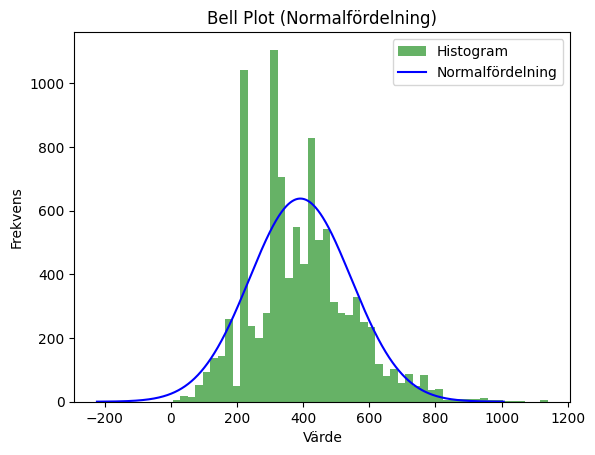

In [ ]:
x = np.linspace(mean_num - 4*std_num, mean_num + 4*std_num, 1000)
bin_width = (x[-1] - x[0]) / 50
y = (1 / (std_num * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_num) / std_num) ** 2) * len(data) * bin_width

plt.hist(data, bins=50, alpha=0.6, color='g', label='Histogram')
plt.plot(x, y, label="Normalfördelning", color="blue")

plt.title("Bell Plot")
plt.xlabel("episodes")
plt.ylabel("values")
plt.legend()

plt.show()

plt.savefig("data/normalfördelning.png", dpi=300, bbox_inches='tight')
plt.close()

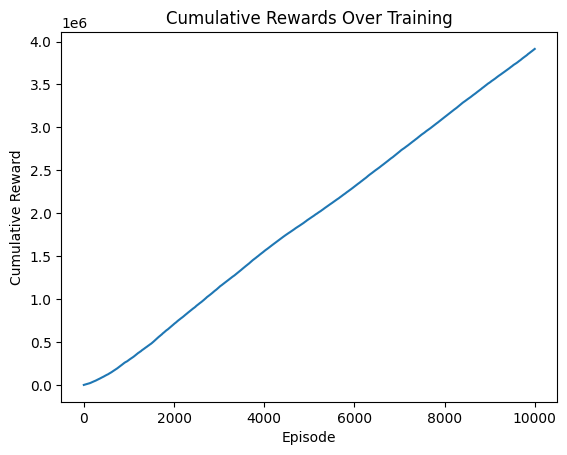

In [13]:
cumulative_rewards = np.cumsum(data)
plt.plot(cumulative_rewards)
plt.title("Cumulative Rewards Over Training")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.show()

plt.savefig("data/kumulativ_fördelning.png", dpi=300, bbox_inches='tight')
plt.close()
